<h4>IOT DENGAN KEMAMPUAN CERDAS [VMD]</h4>
Fariz Muhammad Rizky</br>
1301184327 - IF-42-GAB04

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz, filtfilt
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('7.csv')
df.columns = ['index','b','c','d','e']
df = df.astype({'index':'int64'}).set_index('index')
df.head()

,b,c,d,e
index,,,,
1,1895,2283,1785,1
2,1889,2279,1794,1
3,1892,2276,1794,1
4,1892,2280,1787,1
5,1892,2276,1771,1


In [3]:
# Ambil data pada kolom dan dimasukkan ke dalam variabel
dfB = df['b']
dfC = df['c']
dfD = df['d']
# dfC = pd.DataFrame(dfC)

<h3>LPF (Low Pass Filtering)</h3>

In [4]:
#Ref: https://stackoverflow.com/questions/25191620/
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = fs * 0.5
    temp = cutoff / nyq
    normal_cutoff = temp
    b, a = butter(order, normal_cutoff, btype = 'low')
    return filtfilt(b,a,data)


# Filter requirements.
order = 6
fs = 50.0 # sample rate
cutoff = 3  #cutoff frequency

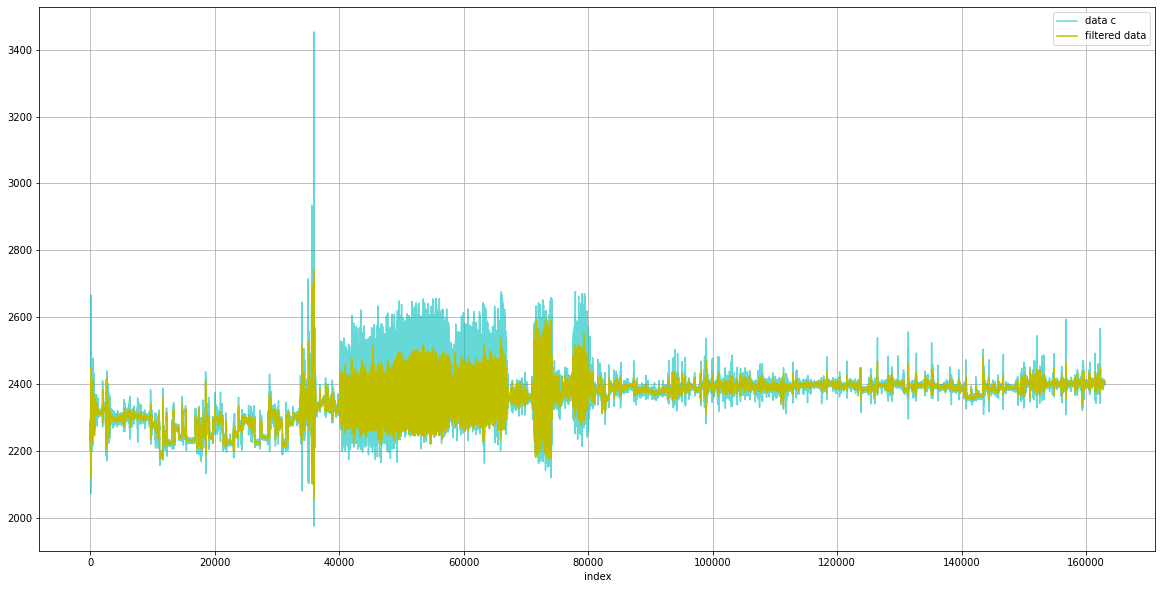

In [5]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(dfC, cutoff, fs, order)

dfC.plot(label='data c', figsize=(20,10), alpha=0.6, color="c")
plt.plot(y, label='filtered data', color="y")
plt.grid()
plt.legend()
plt.show()

<h3>MVA (Moving Average)</h3>

In [6]:
def MVA_Filter(data,window_size):
  result = data.rolling(window=window_size).mean()
  return result

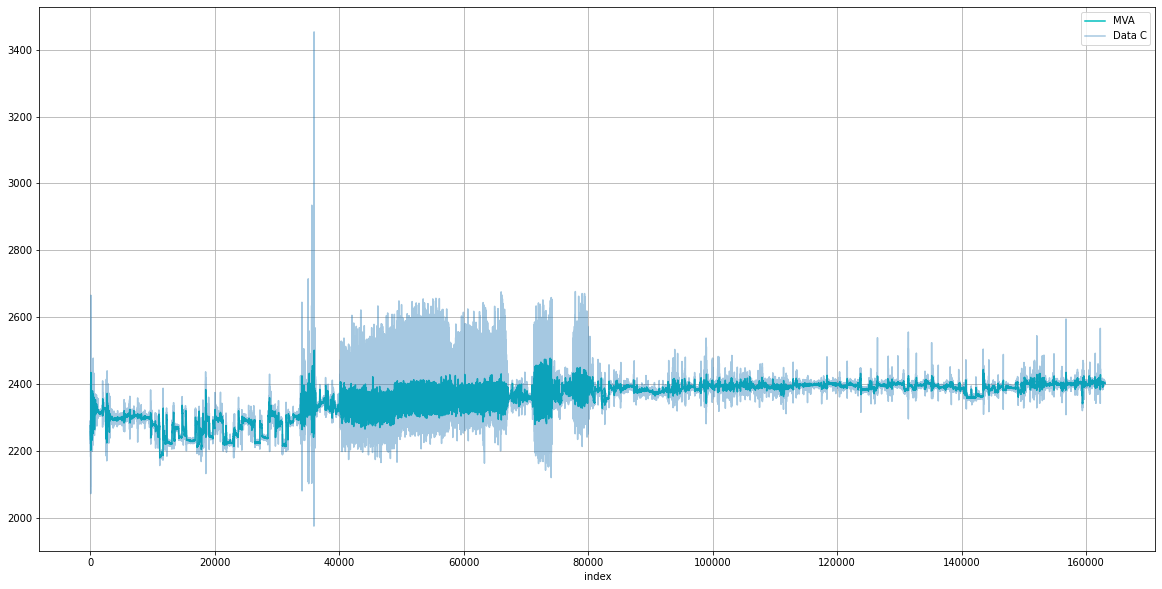

In [7]:
MVA_Filter(dfC,20).plot(label='MVA', figsize=(20,10), color='c')
plt.plot(dfC, label= 'Data C', alpha=0.4)
plt.grid()
plt.legend()

<h3>Individual Task</h3>

1.Plot the raw data and compared to LPF and MVA Filter

<h4>LPF dan MVA</h4>

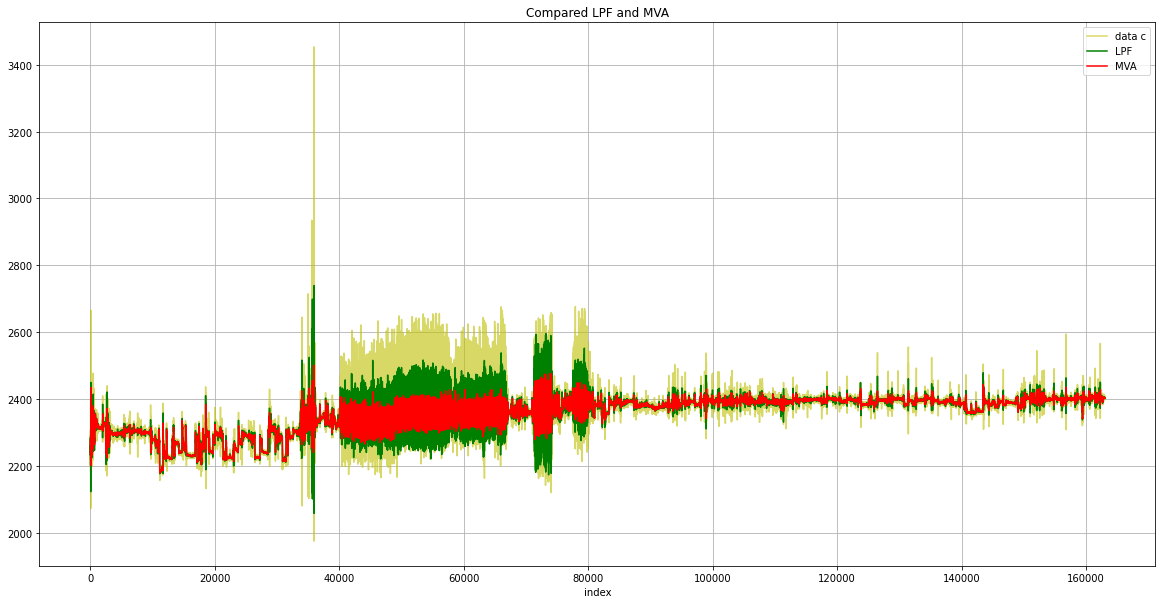

In [8]:
y = butter_lowpass_filter(dfC, cutoff, fs, order)

dfC.plot(label='data c', figsize=(20,10), alpha=0.6, color="y")
plt.plot(y, label='LPF', color="g")
MVA_Filter(dfC,20).plot(label='MVA', color='r')

plt.grid()
plt.legend()
plt.title('Compared LPF and MVA')
plt.show()

2. Which frequency cut-off (fc) do you use for LPF? How 
do you  determine that fc ? (please provide a plot of 
filtered data regarding the frequency cutt-off you used)</br>
Semakin tinggi nilai fs maka akan semakin halus tetapi akan banyak data yang hilang karena reduksi.

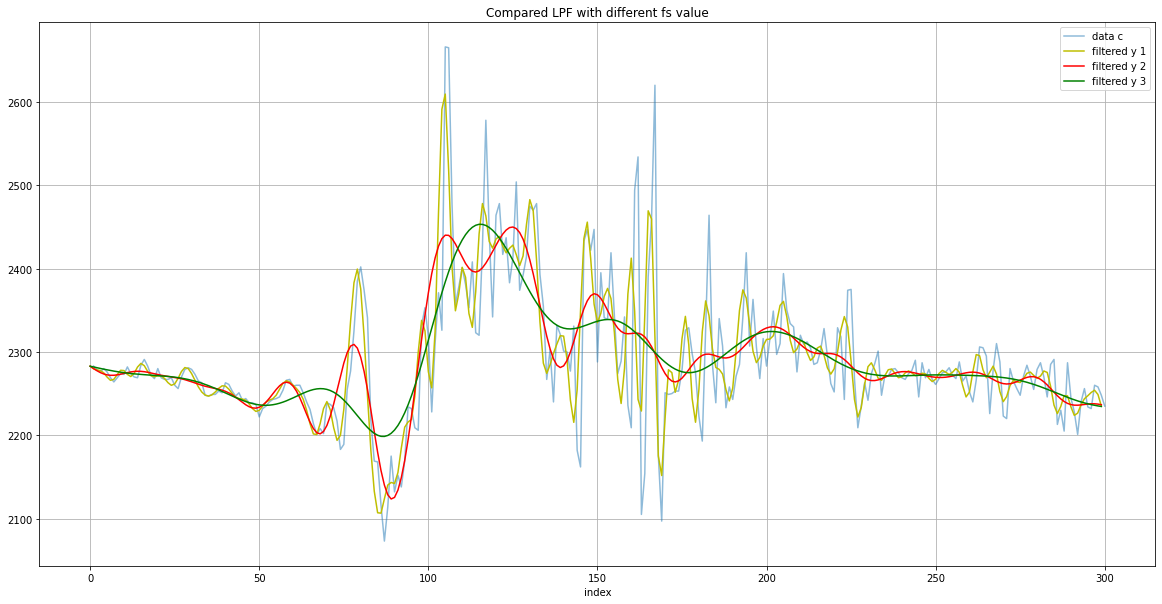

In [9]:
# Ambil 300 data supaya terlihat lebih jelas
dfC_2 = dfC[:300]

y1 = butter_lowpass_filter(dfC_2, cutoff, 15, order)
y2 = butter_lowpass_filter(dfC_2, cutoff, 50, order)
y3 = butter_lowpass_filter(dfC_2, cutoff, 100, order)

dfC_2.plot(label='data c', figsize=(20,10), alpha=0.5)
plt.plot(y1, label='filtered y 1', color='y')
plt.plot(y2, label='filtered y 2', color='r')
plt.plot(y3, label='filtered y 3', color='g')
plt.grid()
plt.legend()
plt.title('Compared LPF with different fs value')
plt.show()

3. What is the windows size you used in MVA ? (please 
select 3 different windows size, and then plot and 
compared the results). Which windows size does give 
smooth data plot? Why?</br>
<b>Answer:</b> Windows size adalah jumlah sinyal yang akan dicari rata-ratanya.
</br>Pada contoh dibawah, terdapat 3 plot dengan window size berbeda. Plot dengan window size 45 mempunyai grafik yang paling halus. Semakin tinggi window size, semakin halus grafik yang dihasilkan karena pencarian jumlah sinyal yang dicari rata-ratanya dalam satu perhitungan semakin banyak.

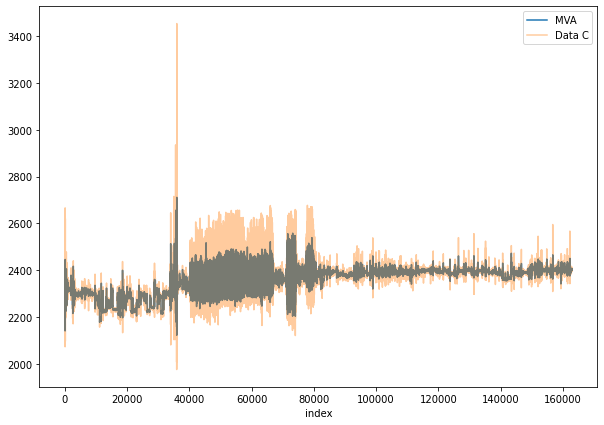

In [10]:
#window size = 10
MVA_Filter(dfC,10).plot(label='MVA', figsize=(10,7))
plt.plot(dfC, label= 'Data C', alpha=0.4)
plt.legend()

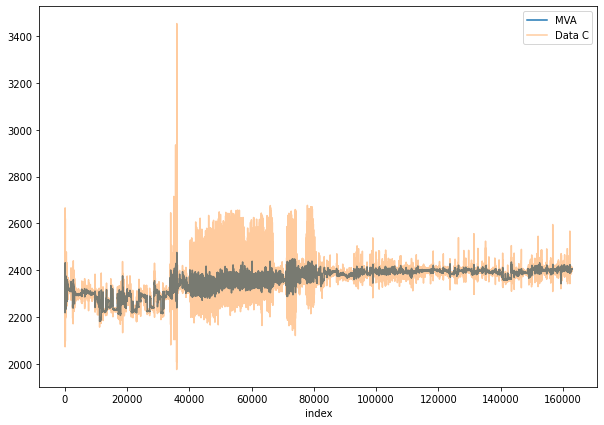

In [11]:
#window size = 25
MVA_Filter(dfC,25).plot(label='MVA', figsize=(10,7))
plt.plot(dfC, label= 'Data C', alpha=0.4)
plt.legend()

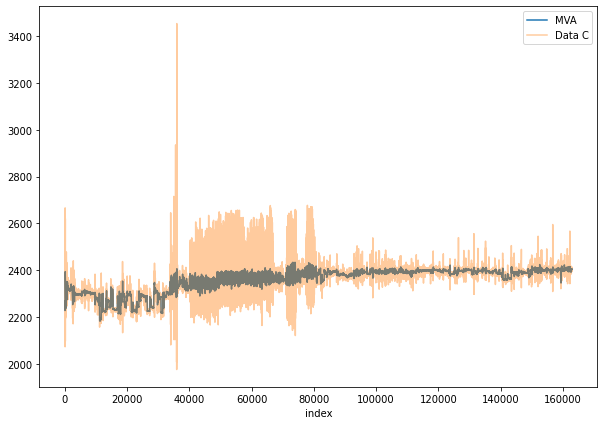

In [12]:
#window size = 45
MVA_Filter(dfC,45).plot(label='MVA', figsize=(10,7))
plt.plot(dfC, label= 'Data C', alpha=0.4)
plt.legend()